## Importing Required Libraries

In this section, we import the necessary Python libraries to implement and evaluate the k-NN algorithm.

- `pandas`: library for data manipulation and analysis
- `numpy`: library for numerical operations
- `matplotlib.pyplot`: library for plotting and visualization
- `seaborn`:library for generating better plots
- `sklearn.model_selection`: for splitting data into training and testing sets from scikit library
- `sklearn.metrics`: for evaluating model performance from scikit library
- `knn`: my module for the k-NN algorithm, imported as `SimpleKNN`



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from knn import SimpleKNN

## Loading the Dataset

In this section, we load the Wine dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). The dataset consists of 178 instances, each described by 13 numerical features and a class label (1, 2, or 3).  

### Dataset Features:
- **Class**: The target variable with three possible values (1, 2, or 3), representing different types of wine.
- **Features**: 13 numerical attributes related to chemical properties of the wine, including:
  - Alcohol
  - Malic acid
  - Ash
  - Alcalinity of ash
  - Magnesium
  - Total phenols
  - Flavanoids
  - Nonflavanoid phenols
  - Proanthocyanins
  - Color intensity
  - Hue
  - OD280/OD315 of diluted wines
  - Proline

We load the dataset using `pandas.read_csv()` and specify the column names for better readability. Finally, we display the first few rows of the dataset to verify successful loading.



In [2]:
# loading the dataset from UCI ML Rep url

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
df = pd.read_csv(data_url, header=None, names=column_names)
df.head()  # to show first rows

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Visualizing Feature Distributions

To gain insight into the dataset, we use visualization techniques to explore the relationships between selected features and the class labels.

### Feature Selection
For simplicity, we visualize three features:
- **Alcohol**
- **Malic acid**
- **Color intensity**

### Visualization Technique
- `sns.pairplot()`: Generates pairwise scatter plots of the selected features, colored by the `Class` label.
- This helps us understand how well the classes are separated based on these features.


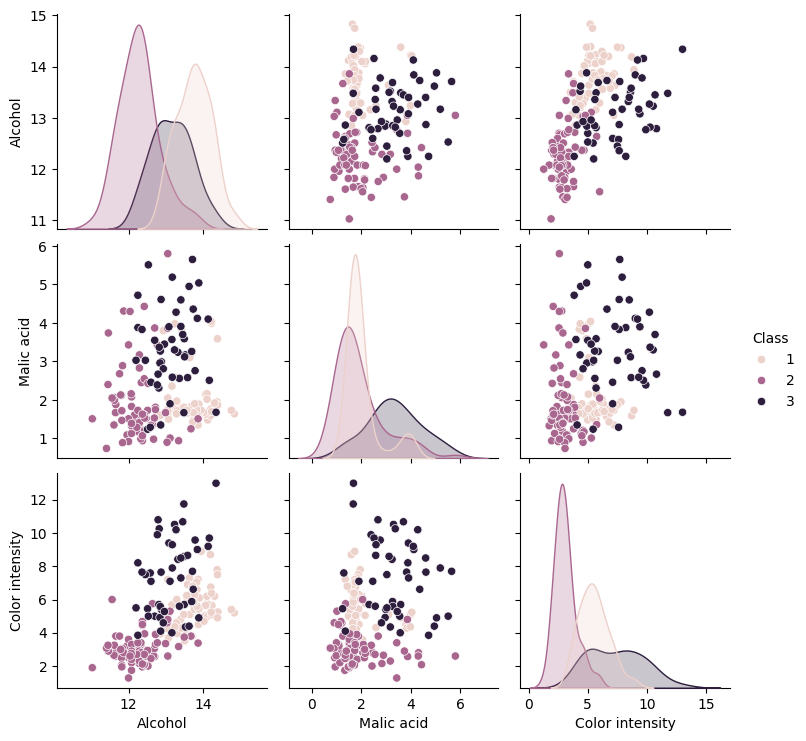

In [3]:
#plotting distributions of feature in dataset with using pairplot
sns.pairplot(df, vars=['Alcohol', 'Malic acid', 'Color intensity'], hue='Class')
plt.show()

## Preprocessing - Normalization and Dataset Splitting

To ensure the k-NN algorithm performs optimally, we preprocess the dataset by normalizing the features and splitting the data into training and testing sets.

### Preprocessing Steps

1. **Separating Features and Labels**  
   - The `Class` column is the target label, while the rest of the columns represent the features.  
   - We split the DataFrame into `df_features` (features) and `df_labels` (labels).  

2. **Normalization (Z-Score Normalization)**  
   - Since k-NN is distance-based algorythm, it features with larger ranges can dominate the distance calculation.  
   - To address this, we apply z-score normalization, which transforms the data to have a mean of 0 and a standard deviation of 1.  
   - This ensures that all features contribute equally during distance calculations.  

3. **Splitting the Dataset**  
   - We split the dataset into training (80%) and testing (20%) sets using the `train_test_split()` function from `sklearn.model_selection`.  
   - Setting `random_state=42` ensures reproducibility of results.  


In [4]:
# separate features and labels
df_features = df.drop('Class', axis=1)
df_labels = df['Class']

#z-score normalization
X = (df_features - df_features.mean()) / df_features.std()
y = df_labels.values

# 80% of the data is used for training and remaining 20% is used for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Evaluating Different K Values and Distance Metrics

In this section, we evaluate the performance of our custom k-NN algorithm by experimenting with various values of \( k \) and comparing different distance metrics.

### Parameters to Explore
1. **k-values:**  
   - We test the model using different values of " k " \( eg. \): `[1, 3, 5, 7, 9]`.  
   - The choice of " k " can significantly impact the model’s accuracy and generalization ability.  

2. **Distance Metrics:**  
   - `Euclidean distance`: The most common distance metric, calculated as the straight-line distance between two points.  
   - `Manhattan distance`: Measures distance as the sum of absolute differences along each dimension (also known as L1 distance).  

### Evaluation Process
- For each combination of \( k \) and distance metric, we:
  - Train the `SimpleKNN` model on the training data.
  - Calculate accuracy on the testing data.
  - Store the accuracy results for comparison.


In [5]:
# we compare the resultswith different values of k and for Euclidean or Manhattan distances
k_values = [1, 3, 5, 7, 9]
distance_metrics = ['euclidean', 'manhattan']

results = {}

for metric in distance_metrics:
    accuracies = []
    for k in k_values:
        model = SimpleKNN(neighbors=k, dist_metric=metric)
        model.train(X_train.values, y_train)
        acc = model.accuracy(X_test.values, y_test) 
        accuracies.append(acc)
    results[metric] = accuracies

## Plotting Accuracy vs. K

To better understand how the choice of \( k \) and distance metric affects model performance, we visualize the accuracy results for each combination.

### Plotting Process
- We plot accuracy scores for different values of \( k \) using both `Euclidean` and `Manhattan` distance metrics.
- This comparison helps identify:
  - The optimal \( k \) value for each metric.
  - Which distance metric performs better for the dataset.

### Visualization Details
- **X-axis:** \( K \) values.
- **Y-axis:** Accuracy of the model.
- **Title:** Clearly indicates the purpose of the plot.
- **Legend:** Differentiates between distance metrics (`Euclidean` and `Manhattan`).
- **Grid:** Improves readability of the plot.


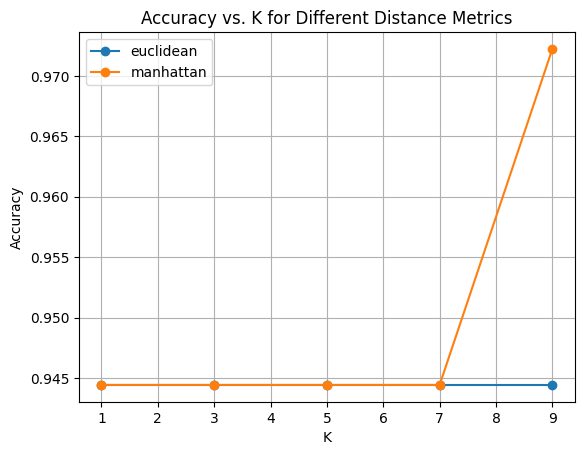

In [6]:
# accuracy vs. K (to show effect of different k values)
for metric in results:
    plt.plot(k_values, results[metric], marker='o', label=f"{metric}")

plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for Different Distance Metrics")
plt.legend()
plt.grid(True)
plt.show()

## Final Evaluation with K=5

After evaluating the model for various \( k \) values and distance metrics, we proceed with a final evaluation using k=5 configuration.

### Model Training and Evaluation
- **Training:**  
  - We train the `SimpleKNN` with the k=5 on the entire training set.  
- **Prediction:**  
  - The trained model is used to predict labels for the test set.  
- **Evaluation:**  
  - We generate a `Confusion Matrix` to visualize the model's performance on each class.  
  - The `Classification Report` provides metrics such as precision, recall, and F1-score for a comprehensive evaluation.  


In [7]:
selected_k = 3  
final_model = SimpleKNN(neighbors=selected_k, dist_metric='euclidean')
final_model.train(X_train.values, y_train)
y_pred = final_model.classify(X_test.values)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # confusion matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred)) #  precision-recall-f1-score-support

Confusion Matrix:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

